In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [2]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Vidit\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
print('Total Positive Tweets: ',len(positive_tweets))
print('Total Negative Tweets: ',len(negative_tweets))

Total Positive Tweets:  5000
Total Negative Tweets:  5000


In [5]:
type(positive_tweets)

list

In [6]:
positive_tweets[0]

'#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)'

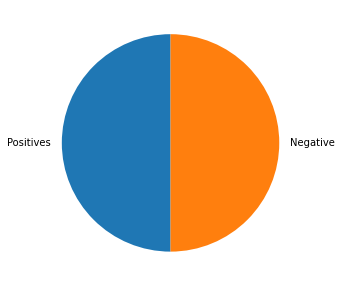

In [7]:
fig = plt.figure(figsize=(5, 5))

labels = 'Positives', 'Negative'
sizes = [len(positive_tweets), len(negative_tweets)] 

plt.pie(sizes, labels=labels, startangle=90)

plt.show()

In [8]:
# Sample Tweet
tweet = positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [9]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer        
from nltk.tokenize import TweetTokenizer

In [10]:
# Removing hyperlinks, hashtags, Retweet Marks
print(tweet)

# remove old style retweet text "RT"
tweet1 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet1 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet1)

# remove hashtags
# only removing the hash # sign from the word
tweet1 = re.sub(r'#', '', tweet1)

print('\n'+tweet1)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [11]:
# Tokenizing our string

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
tweet_tokens = tokenizer.tokenize(tweet1)
print(tweet_tokens)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [12]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [13]:
cleaned_tweet=[]

for word in tweet_tokens:
    if(word not in stopwords_english and word not in string.punctuation):
        cleaned_tweet.append(word)
print(cleaned_tweet)

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [14]:
print(len(tweet_tokens)) # Original String
print(len(cleaned_tweet)) # Cleaned String

16
11


In [15]:
# Stemming
# It is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

stemmer = PorterStemmer()
tweet_stem = []

for word in cleaned_tweet:
    tweet_stem.append(stemmer.stem(word))

print(tweet_stem)

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [16]:
print(len(tweet_stem))

11


In [17]:
from functions import process_tweet # see functions.py file

process_tweet(positive_tweets[2277])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vidit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['beauti',
 'sunflow',
 'sunni',
 'friday',
 'morn',
 ':)',
 'sunflow',
 'favourit',
 'happi',
 'friday',
 '…']